# Importation de bibliothèques

!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow


In [1]:
import pandas as pd
import numpy as np

About Dataset

<b>Description</b>:
<p>Cet ensemble de données constitue une ressource précieuse pour la détection et l'analyse des domaines de phishing dans les URL. Il comprend une gamme de fonctionnalités extraites des URL pour faciliter l'identification des tentatives potentielles de phishing. Avec plusieurs fonctionnalités capturant diverses caractéristiques d'URL, cet ensemble de données offre une vue complète des attributs souvent associés aux activités de phishing.</p>

<b>Principales caractéristiques</b>:
<li>Plusieurs fonctionnalités capturant les caractéristiques de l'URL</li> 
<li>Données pour aider à la détection des domaines de phishing</li>

<b>Applications potentielles</b>:
<li>Détection et analyse des domaines de phishing. Recherche de sécurité et détection des menaces</li>
<li>Développement de modèles d'apprentissage automatique pour la classification d'URL</li>

<b>Cas d'utilisation</b>:
<li>Recherche et analyse sur la cybersécurité</li>
<li>Développement de modèles d'apprentissage automatique pour la classification d'URL</li>
<li>Améliorer les mesures de sécurité pour se protéger contre les attaques de phishing</li>

Lecture des données

In [2]:
df = pd.read_csv('Data/phishing_dataset.csv') 

Prétraitement des données

In [3]:
# Afficher les informations de base sur l'ensemble de données
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [4]:
# Définir les options d'affichage pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)
display(df)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,23,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.135186,0,8560,5509,334,1,3,1,3597,0,

In [5]:
# Affichage de toutes les colonnes de l'ensemble de données
for col in df.columns:
    print(df.columns.get_loc(col), col)

0 qty_dot_url
1 qty_hyphen_url
2 qty_underline_url
3 qty_slash_url
4 qty_questionmark_url
5 qty_equal_url
6 qty_at_url
7 qty_and_url
8 qty_exclamation_url
9 qty_space_url
10 qty_tilde_url
11 qty_comma_url
12 qty_plus_url
13 qty_asterisk_url
14 qty_hashtag_url
15 qty_dollar_url
16 qty_percent_url
17 qty_tld_url
18 length_url
19 qty_dot_domain
20 qty_hyphen_domain
21 qty_underline_domain
22 qty_slash_domain
23 qty_questionmark_domain
24 qty_equal_domain
25 qty_at_domain
26 qty_and_domain
27 qty_exclamation_domain
28 qty_space_domain
29 qty_tilde_domain
30 qty_comma_domain
31 qty_plus_domain
32 qty_asterisk_domain
33 qty_hashtag_domain
34 qty_dollar_domain
35 qty_percent_domain
36 qty_vowels_domain
37 domain_length
38 domain_in_ip
39 server_client_domain
40 qty_dot_directory
41 qty_hyphen_directory
42 qty_underline_directory
43 qty_slash_directory
44 qty_questionmark_directory
45 qty_equal_directory
46 qty_at_directory
47 qty_and_directory
48 qty_exclamation_directory
49 qty_space_directo

In [6]:
# Afficher le résumé statistique des colonnes numériques
df_describe = df.describe()
df_describe

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.0,88647.0,88647.0,88647.000000,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,0.003226,0.002166,0.002786,0.004535,0.000508,0.001895,0.107505,1.047480,36.347615,1.870622,0.114578,0.000756,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440590,18.560820,0.002267,0.004501,-0.323666,-0.360813,-0.477997,0.713685,-0.535935,-0.528343,-0.532550,-0.531422,-0.534310,-0.535145,-0.532765,-0.535224,-0.534863,-0.532235,-0.535935,-0.534626,-0.483457,10.857694,-0.368710,-0.478087,-0.510756,-0.535935,-0.535935,-0.534288,-0.535641,-0.534513,-0.534897,-0.535506,-0.535641,-0.535371,-0.535168,-0.534761,-0.535935,-0.535935,-0.498742,2.743793,-0.811093,-0.878608,-0.862251,-0.88

In [7]:
# Nombre de colonnes
num_columns = len(df.columns)

# Identifier les colonnes numériques int, float et catégorielles
numerical_int_columns = df.select_dtypes(include=['int32', 'int64']).columns
numerical_float_columns = df.select_dtypes(include=[ 'float32', 'float64']).columns
categorical_columns = df.select_dtypes(include='object').columns

# Afficher les informations
print(f"Total columns: {num_columns}")

if len(numerical_int_columns) > 0:
    print(f"Numerical integer columns ({len(numerical_int_columns)}): {', '.join(numerical_int_columns)}")
else:
    print("No numerical integer columns found.")

if len(numerical_float_columns) > 0:
    print(f"Numerical float columns ({len(numerical_float_columns)}): {', '.join(numerical_float_columns)}")
else:
    print("No numerical float columns found.")

if len(categorical_columns) > 0:
    print(f"Categorical columns ({len(categorical_columns)}): {', '.join(categorical_columns)}")
else:
    print("No categorical columns found.")


Total columns: 112
Numerical integer columns (111): qty_dot_url, qty_hyphen_url, qty_underline_url, qty_slash_url, qty_questionmark_url, qty_equal_url, qty_at_url, qty_and_url, qty_exclamation_url, qty_space_url, qty_tilde_url, qty_comma_url, qty_plus_url, qty_asterisk_url, qty_hashtag_url, qty_dollar_url, qty_percent_url, qty_tld_url, length_url, qty_dot_domain, qty_hyphen_domain, qty_underline_domain, qty_slash_domain, qty_questionmark_domain, qty_equal_domain, qty_at_domain, qty_and_domain, qty_exclamation_domain, qty_space_domain, qty_tilde_domain, qty_comma_domain, qty_plus_domain, qty_asterisk_domain, qty_hashtag_domain, qty_dollar_domain, qty_percent_domain, qty_vowels_domain, domain_length, domain_in_ip, server_client_domain, qty_dot_directory, qty_hyphen_directory, qty_underline_directory, qty_slash_directory, qty_questionmark_directory, qty_equal_directory, qty_at_directory, qty_and_directory, qty_exclamation_directory, qty_space_directory, qty_tilde_directory, qty_comma_dire

In [8]:
# Vérifier les valeurs nulles, NaN ou vides dans l'ensemble de données
missing_values = df.isnull().sum() + df.isna().sum() + df.eq('').sum()

# Afficher le nombre de valeurs manquantes
if missing_values.sum() > 0:
    print("Count of missing values per column:")
    print(missing_values)
else:
    print("Dataset does not have any null, NaN, or blank values.")

Dataset does not have any null, NaN, or blank values.


L'analyse exploratoire des données

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

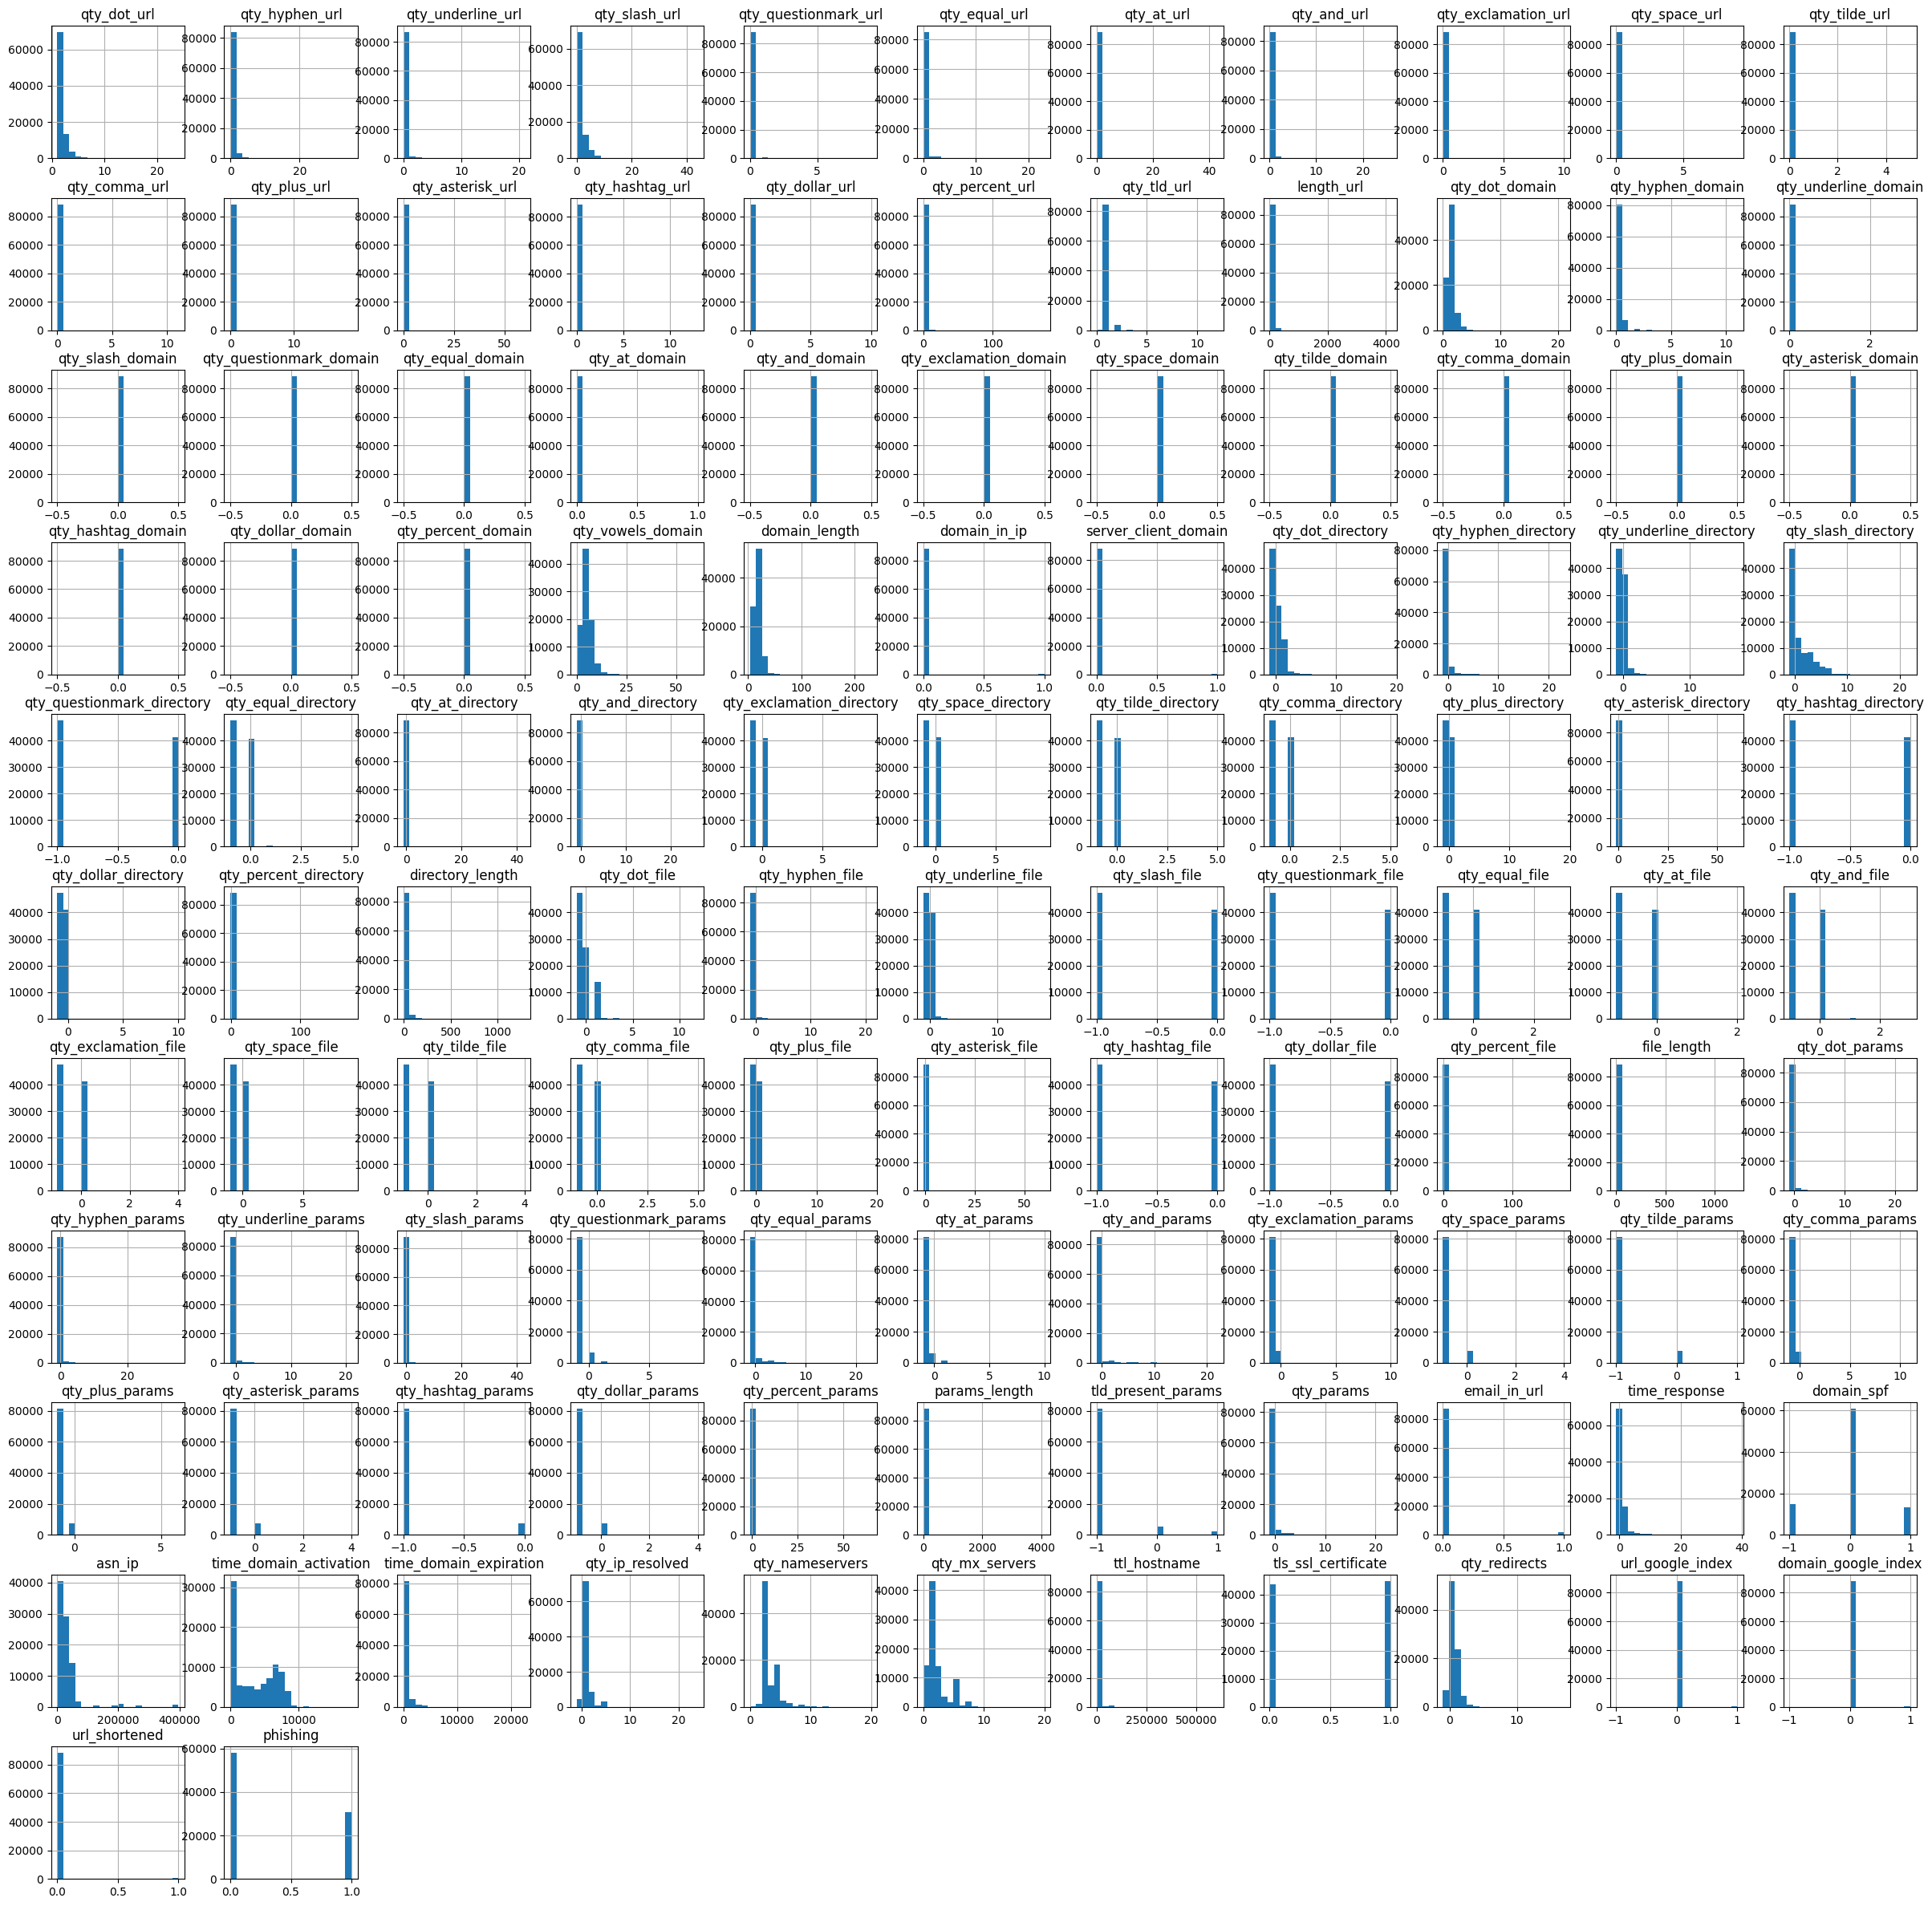

In [10]:
# Histogrammes pour les caractéristiques numériques
df.hist(bins=20, figsize=(30, 30))
plt.show()


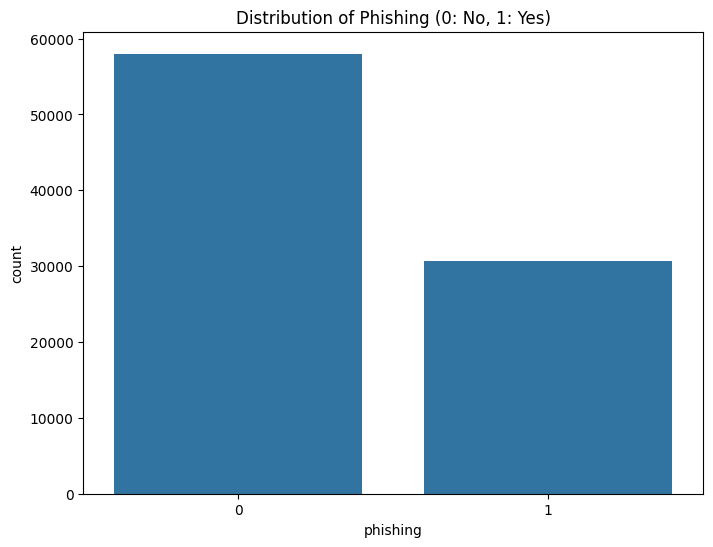

In [11]:
# Distribution de la variable cible 'phishing'
plt.figure(figsize=(8, 6))
sns.countplot(x='phishing', data=df)
plt.title("Distribution of Phishing (0: No, 1: Yes)")
plt.show()


<Figure size 3000x3000 with 0 Axes>

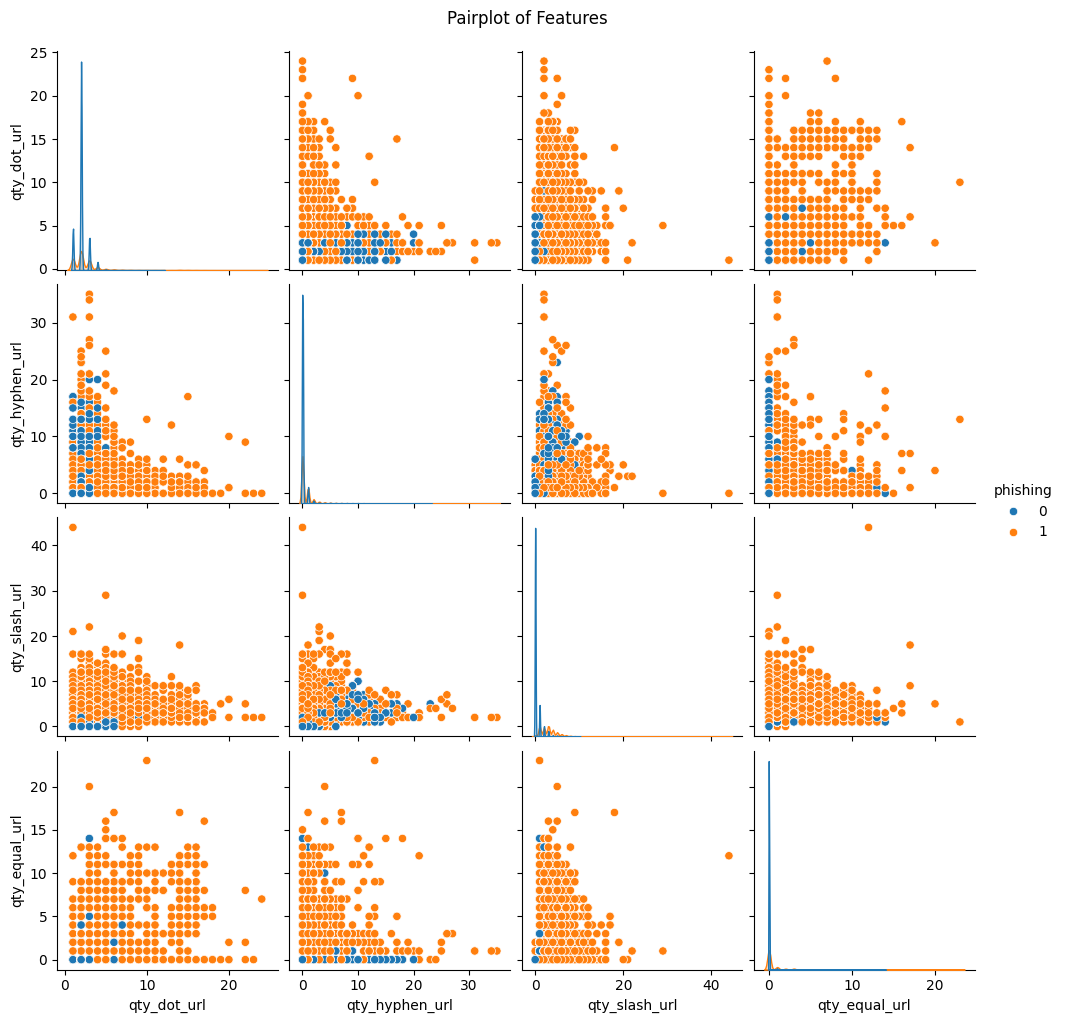

In [12]:
# # Pairplot d'un sous-ensemble de features
plt.figure(figsize=(30, 30))
sns.pairplot(df[['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_equal_url', 'phishing']], hue='phishing')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

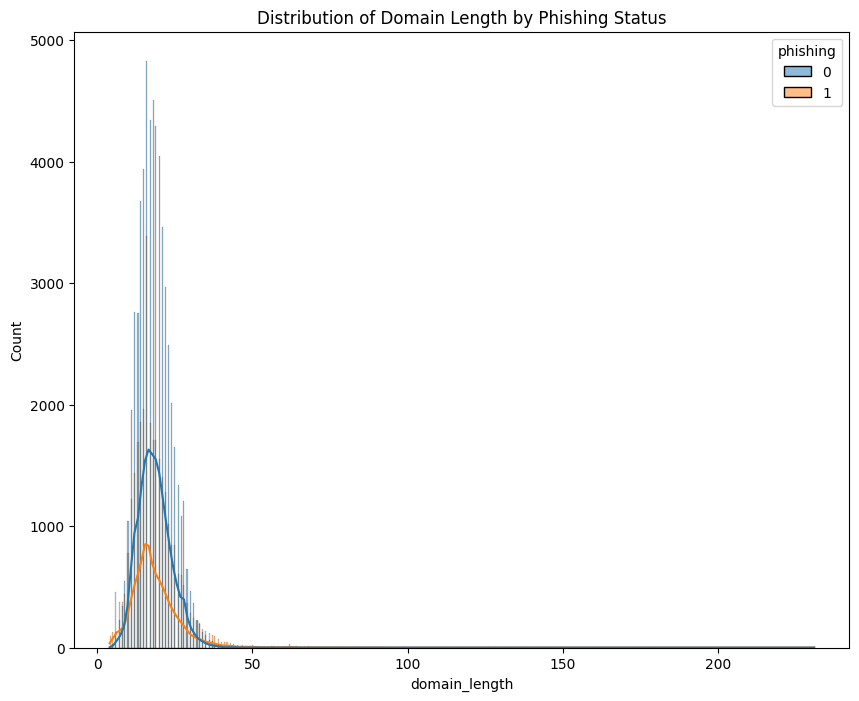

In [13]:
# Répartition de 'domain_length' par statut de phishing
plt.figure(figsize=(10, 8))
sns.histplot(x='domain_length', data=df, hue='phishing', kde=True)
plt.title("Distribution of Domain Length by Phishing Status")
plt.show()

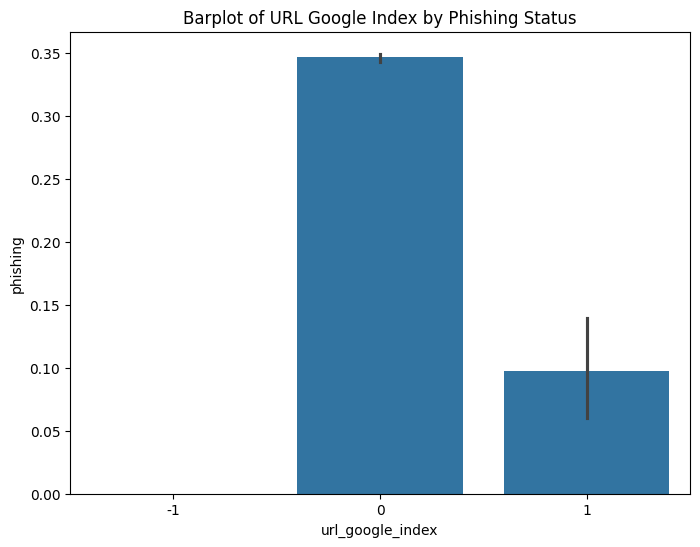

In [14]:
# Barplot de 'url_google_index' par statut de phishing
plt.figure(figsize=(8, 6))
sns.barplot(x='url_google_index', y='phishing', data=df)
plt.title("Barplot of URL Google Index by Phishing Status")
plt.show()

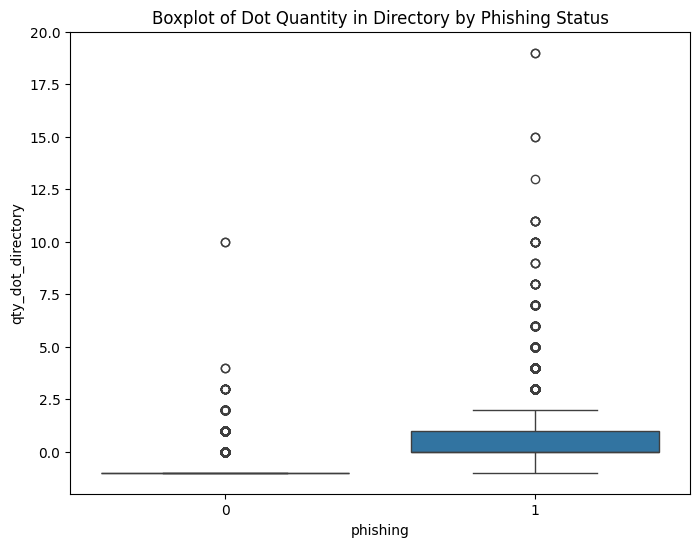

In [15]:
# Boxplot de 'qty_dot_directory' par statut de phishing
plt.figure(figsize=(8, 6))
sns.boxplot(x='phishing', y='qty_dot_directory', data=df)
plt.title("Boxplot of Dot Quantity in Directory by Phishing Status")
plt.show()

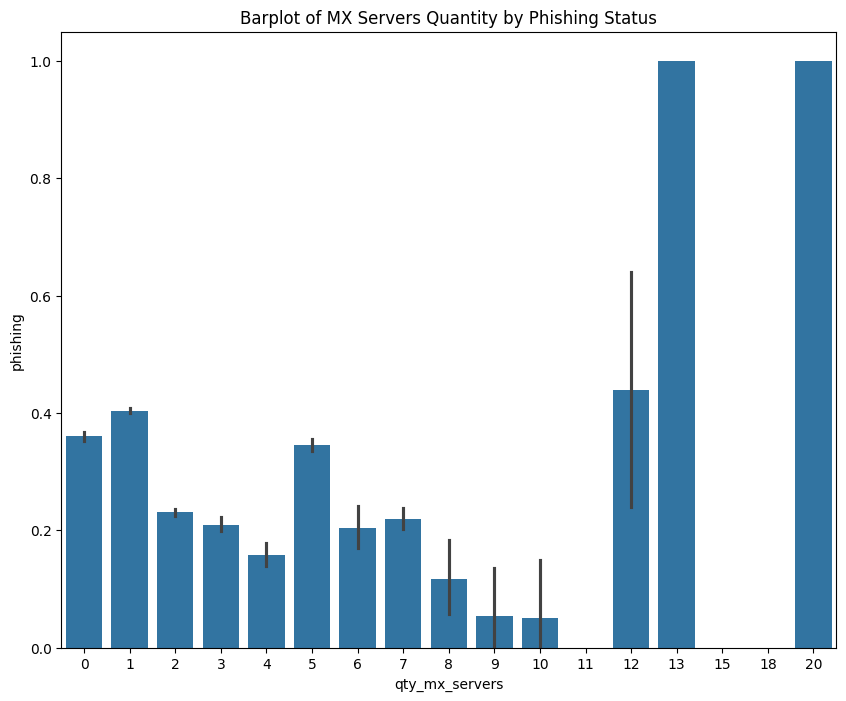

In [16]:
# Barplot de 'qty_mx_servers' par statut de phishing
plt.figure(figsize=(10, 8))
sns.barplot(x='qty_mx_servers', y='phishing', data=df)
plt.title("Barplot of MX Servers Quantity by Phishing Status")
plt.show()

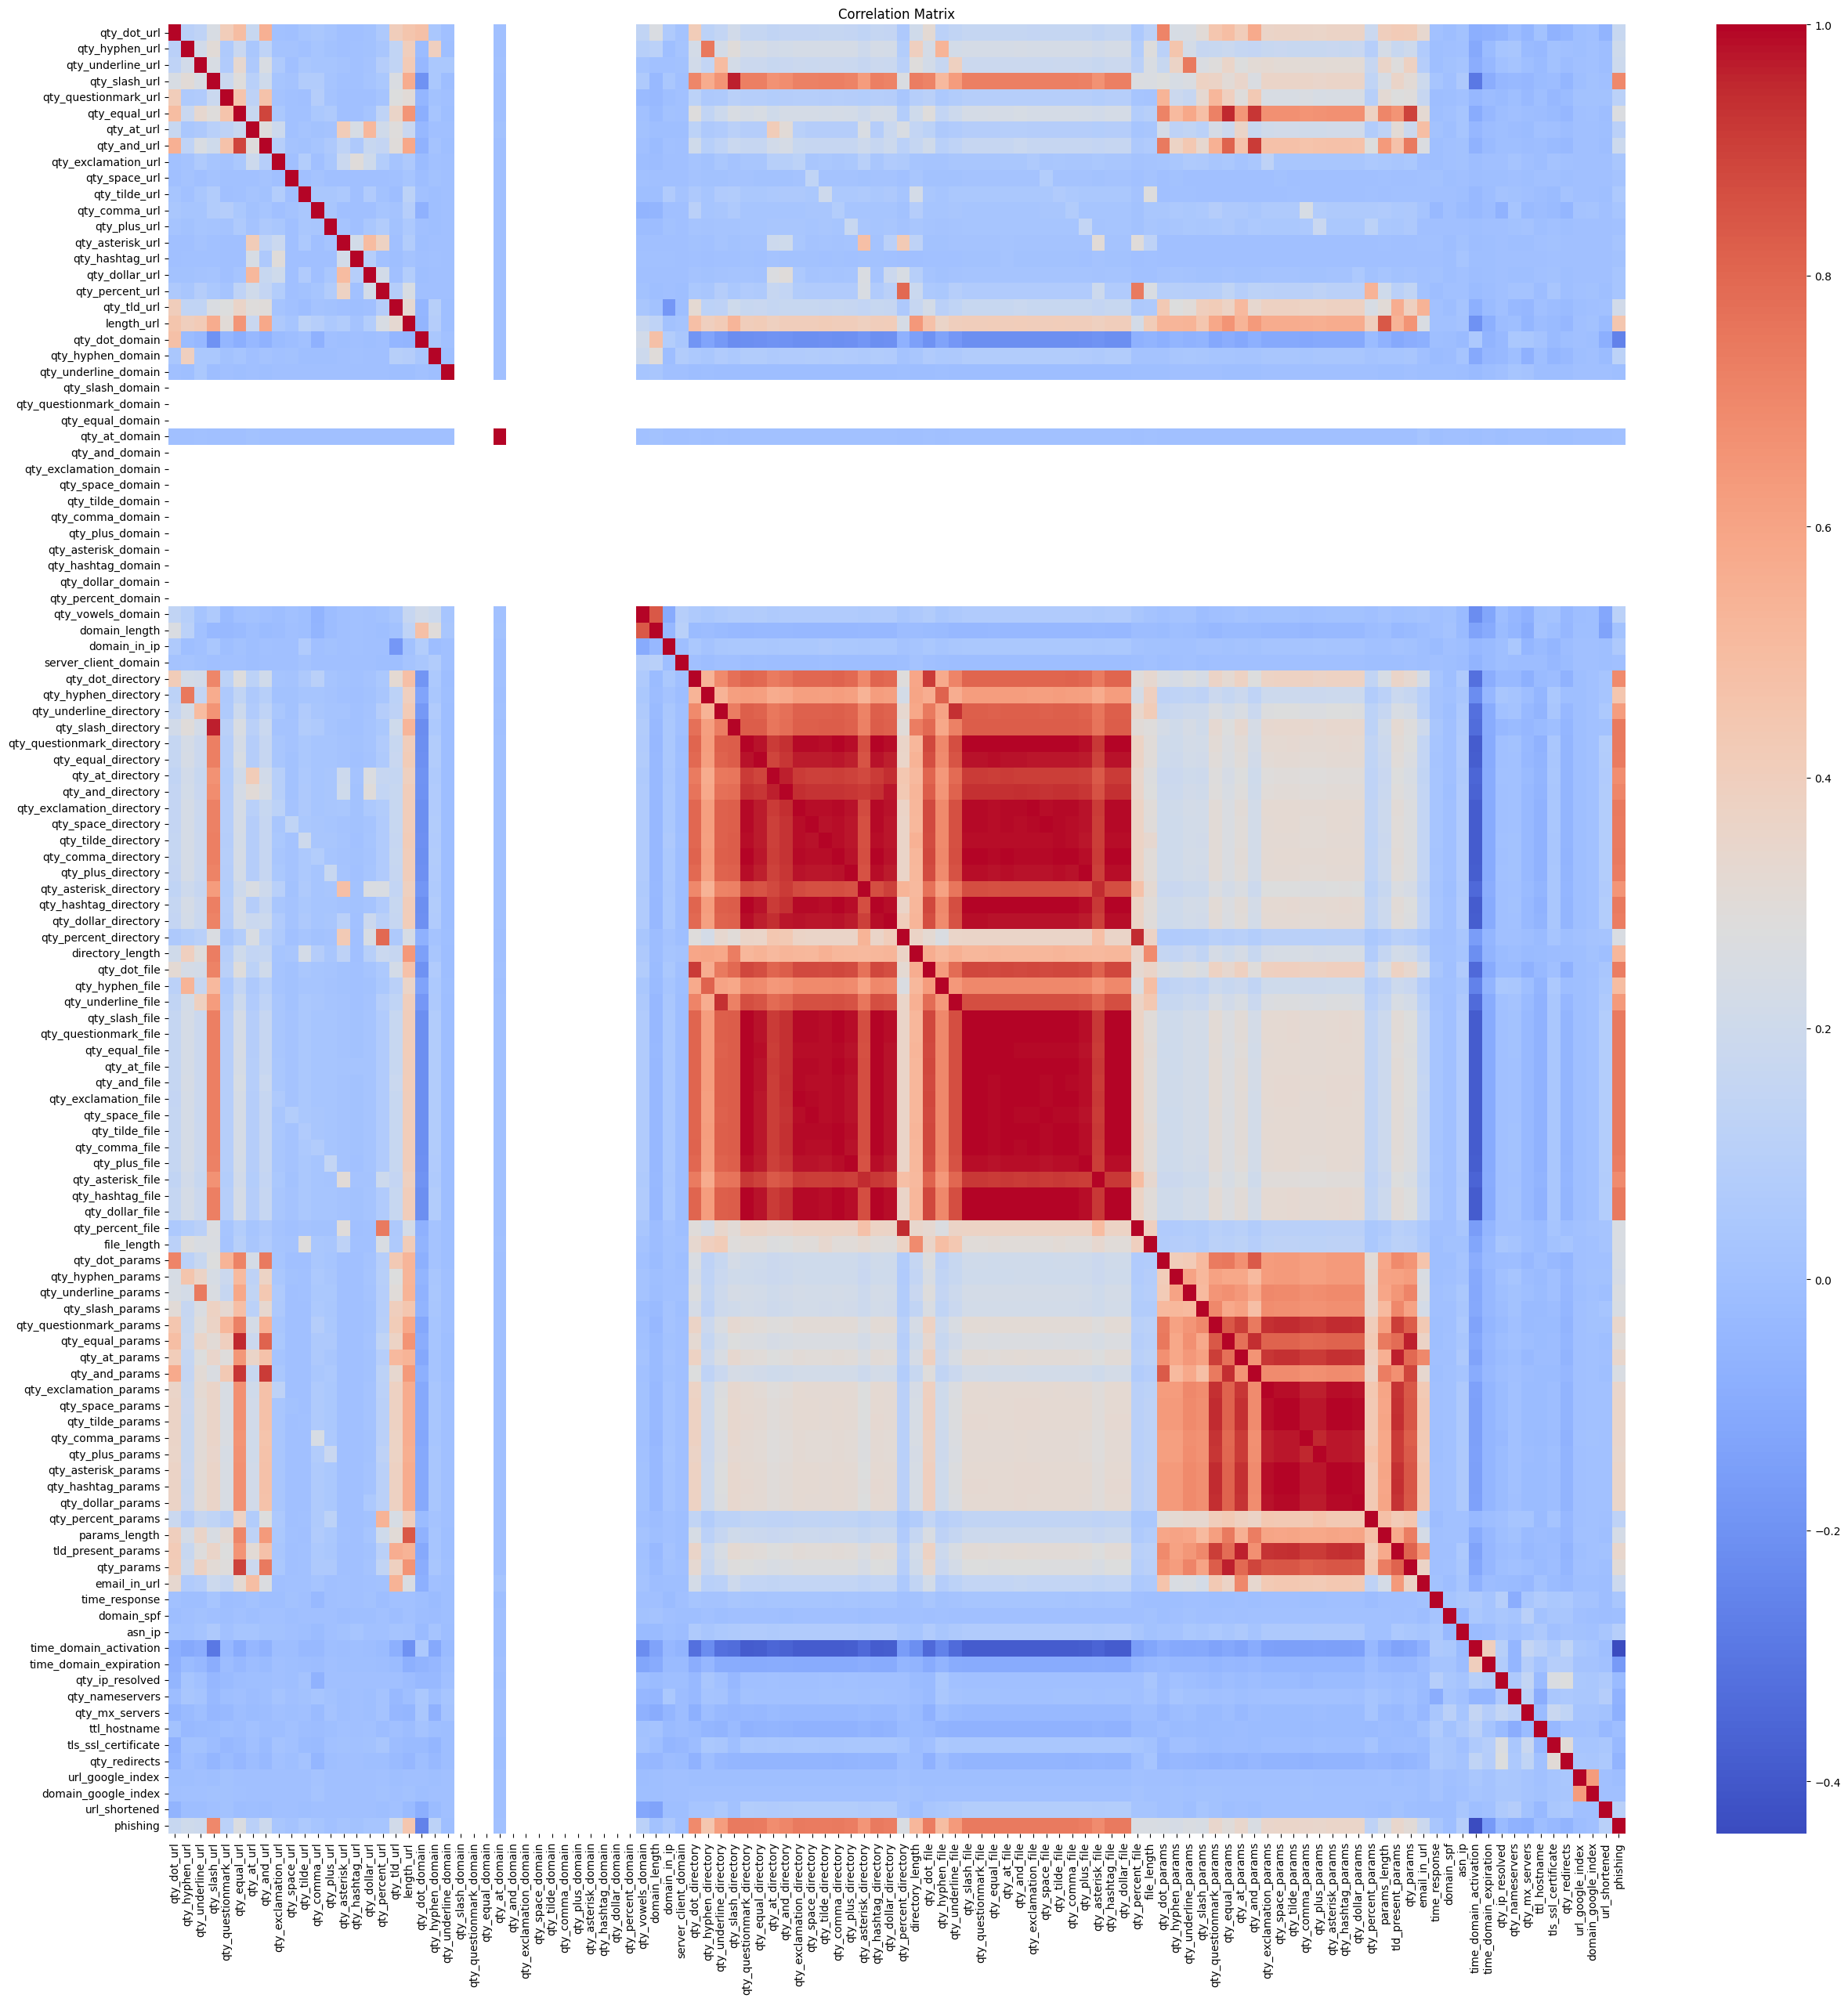

In [17]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# # Créer une matrice de corrélation
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Exercise

- Comprendre les colonnes, tester et générer cinq differentes analyses (insights) à partager avec business, soyez créatif et intuitif!

https://seaborn.pydata.org/examples/index.html
https://matplotlib.org/stable/gallery/index.html

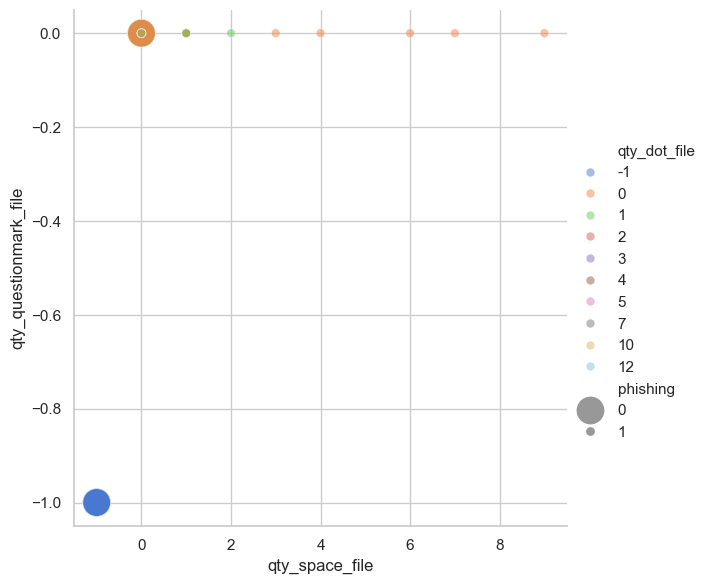

In [18]:
# Scatterplot with varying point sizes and hues
sns.set_theme(style="whitegrid")
sns.relplot(x="qty_space_file", y="qty_questionmark_file", hue="qty_dot_file", size="phishing", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=df) 

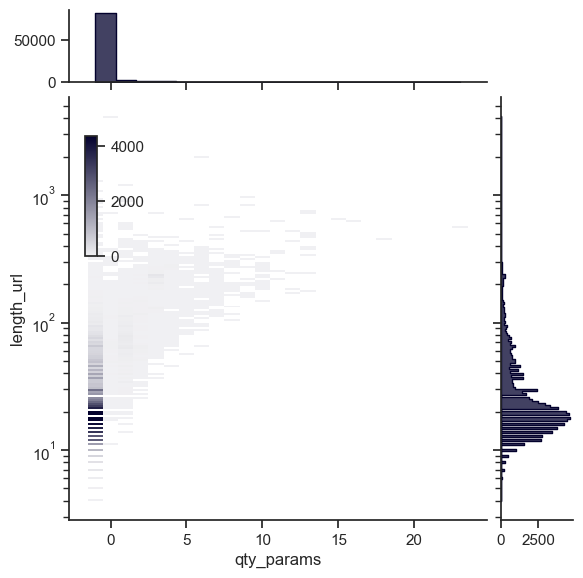

In [19]:
# Joint and marginal histograms
sns.set_theme(style="ticks")

# initialize the figure
g = sns.JointGrid(data=df, x="qty_params", y="length_url", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

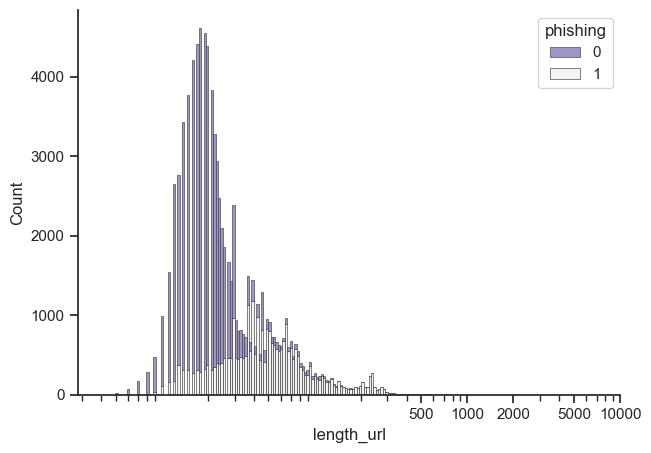

In [24]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="length_url", hue="phishing",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

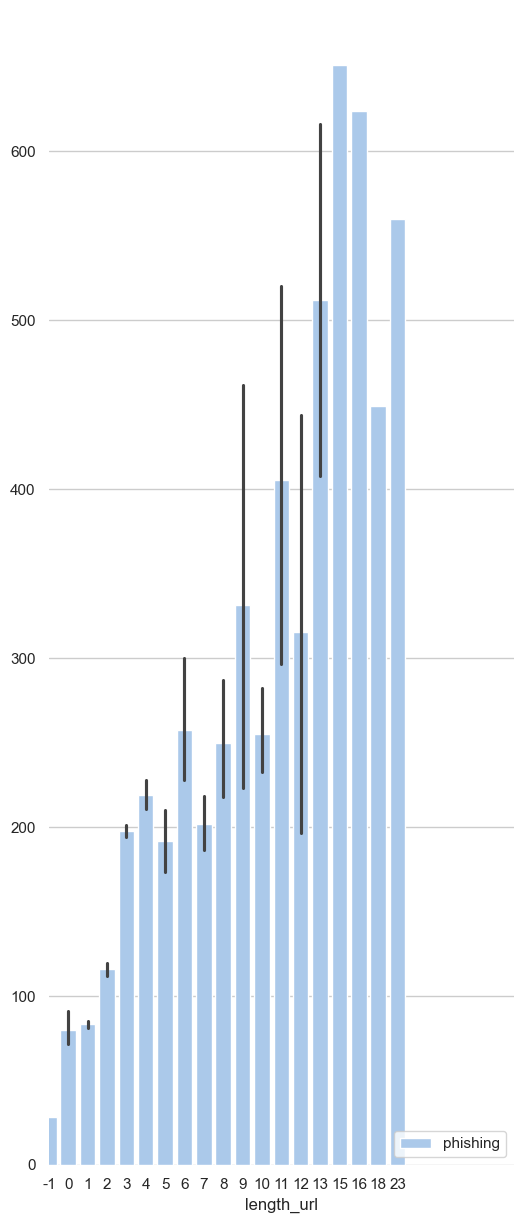

In [23]:
# Horizontal bar plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


sns.set_color_codes("pastel")
sns.barplot(x="qty_params", y="length_url", data=df,
            label="phishing", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="length_url")
sns.despine(left=True, bottom=True)

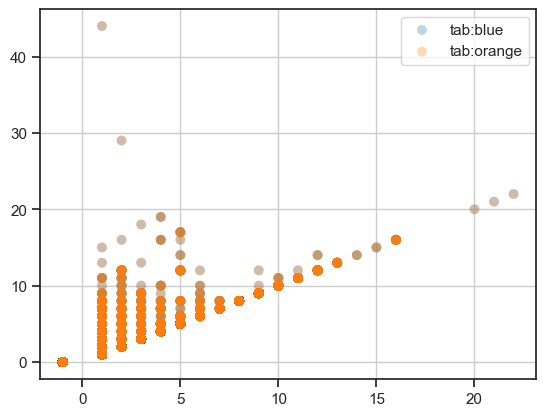

In [32]:
# Scatter plots with a legend

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for color in ['tab:blue', 'tab:orange']:
    n = 750
    x, y = df['qty_slash_directory'], df['qty_slash_url']
    scale = 50  # Changer cette valeur pour ajuster la taille des points
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()
